#**Video Game Speedrun Analysis Using Python**

I am using the dataset found at the following link to perform statistical analyses on.

https://www.kaggle.com/datasets/cmmm976/video-game-speedrun-and-tas-world-record-times

**Package Importing**

We need to import some packages to help with the analysis. I need packages to do all of the following:

Linear Regression

Two-Sample T-Test

Multiple Regression

Dense Neural Network


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=125f8f6e0462a8623cbc4e7cdaba660180866960b97dc0ad20073a57f8566ebf
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

# Neural Network
from keras import models
from keras import layers

Let's also mount to our drive to access the csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/f_dataset.csv')

# Peek at data to make sure it imported properly
df.head()

# Look at only one category to standardize runs
df = df.loc[df['category'] == 'Any%']

# Change %_of_difference column to measure optimization level (subtract from 100%)
df['%_of_difference'] = 100 - df['%_of_difference']
df = df.rename(columns={'%_of_difference': 'optimization'})

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.head())



   Unnamed: 0                           game category  \
0           0            X-Men 2: Clone Wars     Any%   
1           1               Kao the Kangaroo     Any%   
2           2  Mario & Luigi: Superstar Saga     Any%   
3           3                   Black Castle     Any%   
7           7                    Tomb Raider     Any%   

                          game+category    time  released_year  age  \
0            X-Men 2: Clone Wars - Any%  1251.0           1995   26   
1               Kao the Kangaroo - Any%  1517.0           2000   21   
2  Mario & Luigi: Superstar Saga - Any%  4436.0           2003   18   
3                   Black Castle - Any%   512.0           2020    1   
7                    Tomb Raider - Any%  3409.0           1996   25   

   nb_of_runs     main_platform     main_genre  ... Popular Very_Popular  \
0          12      Sega Genesis     Platformer  ...       1            0   
1           2         Dreamcast  3D Platformer  ...       0            0   
2 

Let's do some linear regression to see if we can find a pattern between the age of a game and its optimization.

coefficient of determination: 0.024845970163477338
intercept: 67.7844816381708
slope: [0.44057186]


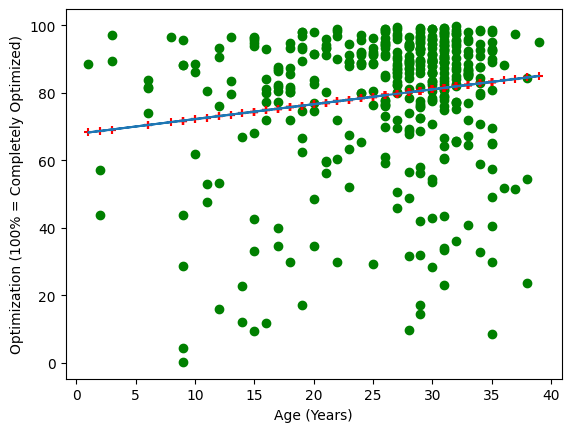

In [ ]:
# filter out rows with NaN values in the optimization column
df = df.dropna(subset=['optimization'])

x = np.array(df['age']).reshape(-1, 1) # age column
y = np.array(df['optimization']) # optimization column

model = LinearRegression().fit(x, y)

print(f"coefficient of determination: {model.score(x, y)}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

y_pred = model.predict(x)

plt.scatter(x,y,c='g')
plt.scatter(x,y_pred,c='r',marker='+')

plt.plot(x,y_pred)

plt.xlabel('Age (Years)')
plt.ylabel('Optimization (100% = Completely Optimized)')

plt.show()

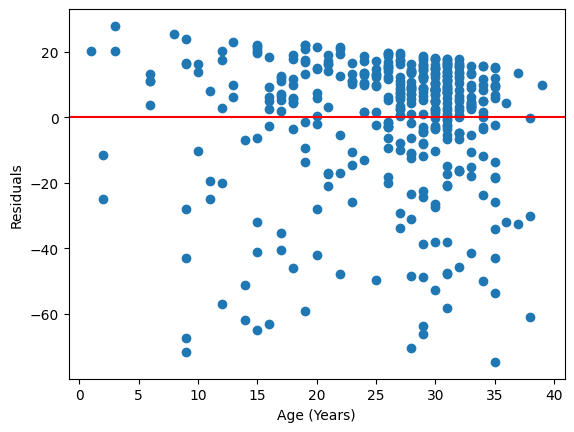

In [ ]:
# Computing the residuals
residuals = y - y_pred

# Creating the residual plot
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Age (Years)')
plt.ylabel('Residuals')
plt.show()

Interestingly enough, there isn't a correlation between age of a game and its optimization. We can see that not only from the graph, but also the coefficient of determination, which is a lowly 0.02, showing almost no correlation.

Next, let's compare games of certain genres to see if certain genres are more optimized than others.

In [ ]:
# get unique values and their counts
value_counts = df['main_genre'].value_counts()

# Shows us our options by printing all unique genres
print(value_counts)

Platformer                46
Action                    23
Action-adventure          10
Platform                   7
RPG                        6
Puzzle                     5
2D Platformer              4
Adventure                  4
JRPG                       3
Platform Game              2
Boxing                     2
Action RPG                 2
3D Platformer              2
Beat 'em up                2
Shoot 'em up               2
Metroidvania               2
Role-playing Game          2
Run and Gun                2
Strategy                   1
Platforming                1
Stealth                    1
Action Platformer          1
Action-Puzzle              1
Action: Side-Scrolling     1
Shooter                    1
Bootleg                    1
Third-Person Shooter       1
retro                      1
Capcom                     1
Puzzle, strategy           1
2D Action Platformer       1
Space Simulation           1
Action Adventure           1
Shooting Gallery           1
Action/Platfor

In [ ]:
platformer = df.loc[df['main_genre'] == '2D Platformer']
action = df.loc[df['main_genre'] == 'Platformer']

platformer_optimization = platformer['optimization']
action_optimization = action['optimization']

print(platformer_optimization)
print(action_optimization)

result = pg.ttest(platformer_optimization,
                  action_optimization,
                  correction = True,
                  alternative = "two-sided",
                  paired = False)

print(result)

95     89.254396
203    90.641054
411    98.743363
423    99.024882
Name: optimization, dtype: float64
0      76.657874
9      98.744707
22     98.055362
28     88.994152
43     92.868263
58     86.976920
60     28.665938
82     95.679231
89     76.698551
90     91.370821
109    92.370370
120    95.914188
121    91.531541
125    43.867676
135    92.900862
140    82.429766
155    93.065852
179    96.171300
180    77.413333
197    80.413836
214    86.079420
228    95.906475
232    87.254777
237    94.306904
256    73.053691
263    89.087610
268    94.676206
270    61.984448
307    86.261662
310    83.943452
318    34.659818
319    91.118952
341    82.379496
342    77.566233
346    88.555521
347    89.442225
353    31.591478
358    92.916667
372    29.773463
376    89.027250
382    95.111511
399    87.413333
405    97.022600
407    81.672115
419    73.872530
431    69.849545
Name: optimization, dtype: float64
               T        dof alternative     p-val          CI95%   cohen-d  \
T-

In [ ]:
result_greater = pg.ttest(platformer_optimization,
                  action_optimization,
                  correction = True,
                  alternative = "greater",
                  paired = False)

print(result_greater)

               T        dof alternative     p-val        CI95%   cohen-d  \
T-test  3.426704  12.588831     greater  0.002351  [6.26, inf]  0.713912   

          BF10    power  
T-test  42.097  0.38413  


The p value is 0.002351, which is much less than the significance level of 0.05. This means that there is significant evidence that the optimization for 2D platformer game speedruns is higher than the optimization for 3D platformer game speedruns.

In [ ]:
x_mult = np.array(df[['nb_of_runs', 'age', 'time']])
y_mult = np.array(df['TAS_time'])

model_mult = LinearRegression().fit(x_mult, y_mult)

r_sq = model_mult.score(x_mult, y_mult)
print(f"coefficient of determination: {r_sq:.4f}")

b0 = model_mult.intercept_
print(f"intercept: {b0:.4f}")

m = model_mult.coef_
print(f"coefficients: {m}")

yhat = b0 + m[0]*5 + m[1]*6 + m[2] * 1192
print("TAS time for 5 runs, 6 years old, and 1192 world record time: {:.2f}".format(yhat))

coefficient of determination: 0.8070
intercept: 35.3778
coefficients: [0.51107543 2.85501162 0.67268777]
TAS time for 5 runs, 6 years old, and 1192 world record time: 856.91


The coefficient of determination is 0.8070, meaning that there is a strong correlation between the number of runs, age, and time and the TAS time.

# **MACHINE LEARNING!**

didn't end up working because I couldn't get the error to a reasonable amount. Probably something wrong with how I set it up, but I ran out of time to fix it.

In [ ]:
train_data = df[['nb_of_runs', 'age', 'time']]
train_data = train_data.iloc[:int(len(train_data)*0.75)]
train_targets = df['TAS_time']
train_targets = train_targets.iloc[:int(len(train_targets)*0.75)]

test_data = df[['nb_of_runs', 'age', 'time']]
test_data = test_data.tail(int(len(test_data)*0.25))
test_targets = df['TAS_time']
test_targets = test_targets.tail(int(len(test_targets)*0.25))

print(train_data.head())
print(train_targets.head())
print(test_data.head())
print(test_targets.head())

   nb_of_runs  age    time
0          12   26  1251.0
1           2   21  1517.0
2          11   18  4436.0
3           3    1   512.0
7          45   25  3409.0
0     958.99
1     852.30
2    3559.35
3     453.10
7    3139.45
Name: TAS_time, dtype: float64
     nb_of_runs  age     time
350          65   29    904.0
351           3   29  13328.0
352          18   31    367.0
353           1   28   6149.0
354          12   16   1960.0
350     897.57
351    7504.71
352     286.11
353    1942.56
354    1586.99
Name: TAS_time, dtype: float64


Neural network with two hidden layers with 64 units each.

In [ ]:
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1)) # Note no activation
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
num_epochs = 200  # For each partition, run 200 epochs to train.
all_mae_histories = [] # Save each history, so we can see how it does

k = 5 # Use three partitions
num_val_samples = len(train_data) // k # Divide by k and round down

for i in range(k): # We are going to train k networks
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/200
138/248 [===============>..............] - ETA: 0s - loss: 2030951.3750 - mae: 768.2359

KeyboardInterrupt: ignored

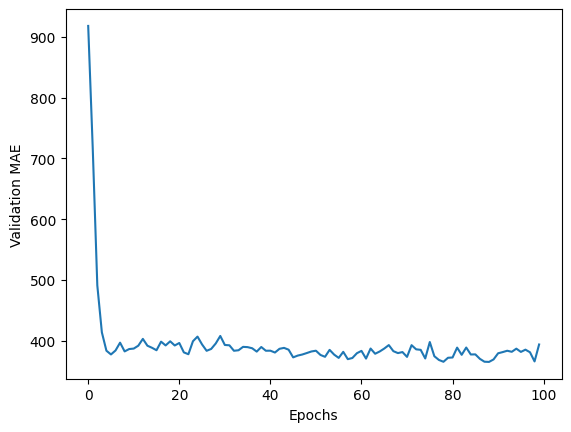

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(average_mae_history)
#plt.plot(average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
max_epoch = 5
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=max_epoch, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 1817599.8750 - mae: 991.6553


In [ ]:
test_mae_score

349.29095458984375

This means it's ~350 seconds off on average, which is abysmal.

4/4 [==============================] - 0s 3ms/step


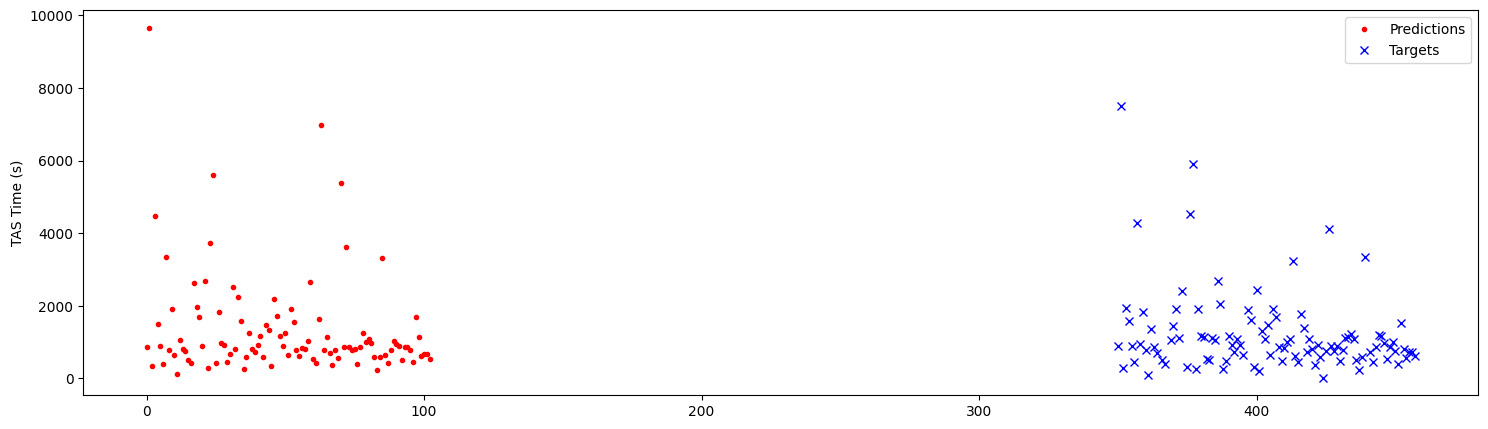

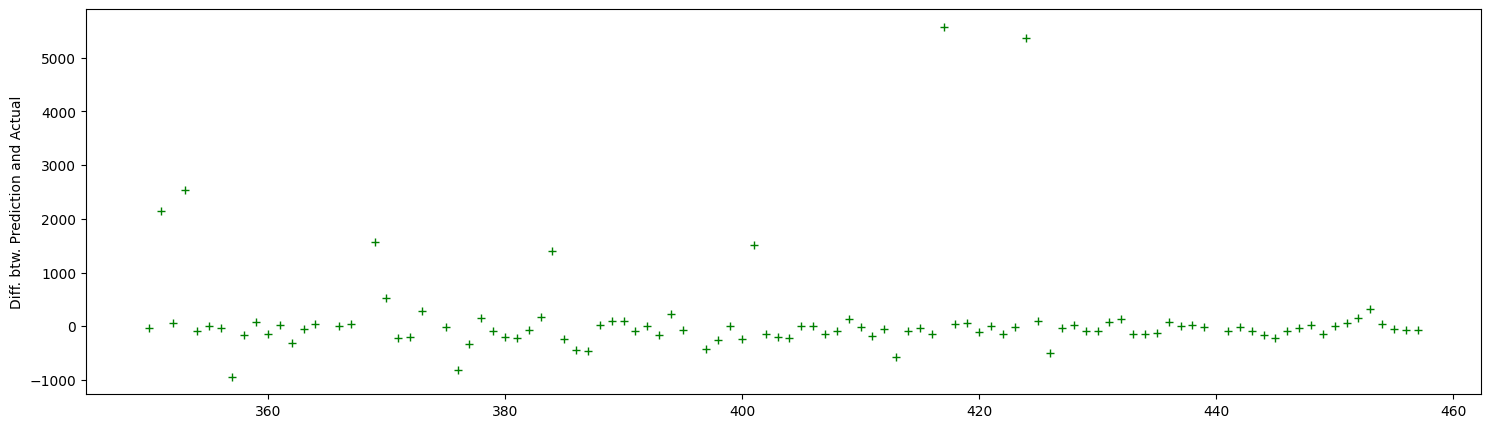

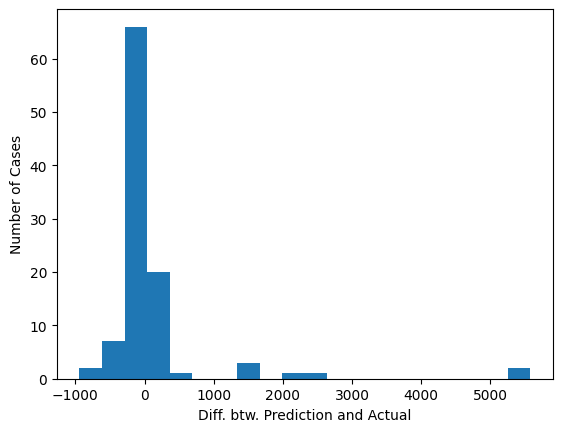

In [ ]:
predictions = model.predict(test_data)

plt.figure(figsize=(18,5))
plt.plot(predictions[:,0],'r.',label='Predictions')
plt.plot(test_targets,'bx',label='Targets')
plt.ylabel('TAS Time (s)')
plt.legend()
plt.show()

plt.figure(figsize=(18,5))
resid = predictions[:,0]-test_targets
plt.plot(resid,'g+')
plt.ylabel('Diff. btw. Prediction and Actual')
plt.show()

plt.hist(resid,bins=20)
plt.xlabel('Diff. btw. Prediction and Actual')
plt.ylabel('Number of Cases')
plt.show()